The following objects are masked from UN.data (pos = 3):

    Fertilidad, Localidad, PBIpp, Purban

The following objects are masked from UN.data (pos = 4):

    Fertilidad, Localidad, PBIpp, Purban

The following objects are masked from UN.data (pos = 5):

    Fertilidad, Localidad, PBIpp, Purban

The following objects are masked from UN.data (pos = 6):

    Fertilidad, Localidad, PBIpp, Purban

The following objects are masked from UN.data (pos = 7):

    Fertilidad, Localidad, PBIpp, Purban

The following objects are masked from UN.data (pos = 8):

    Fertilidad, Localidad, PBIpp, Purban

The following objects are masked from UN.data (pos = 9):

    Fertilidad, Localidad, PBIpp, Purban

The following objects are masked from UN.data (pos = 10):

    Fertilidad, Localidad, PBIpp, Purban



Localidad,Fertilidad,PBIpp,Purban
Afghanistan,6.80,98,22
Albania,2.28,1317,43
Algeria,2.80,1784,58
Angola,7.20,739,35
Argentina,2.44,7163,88
Armenia,1.15,687,67


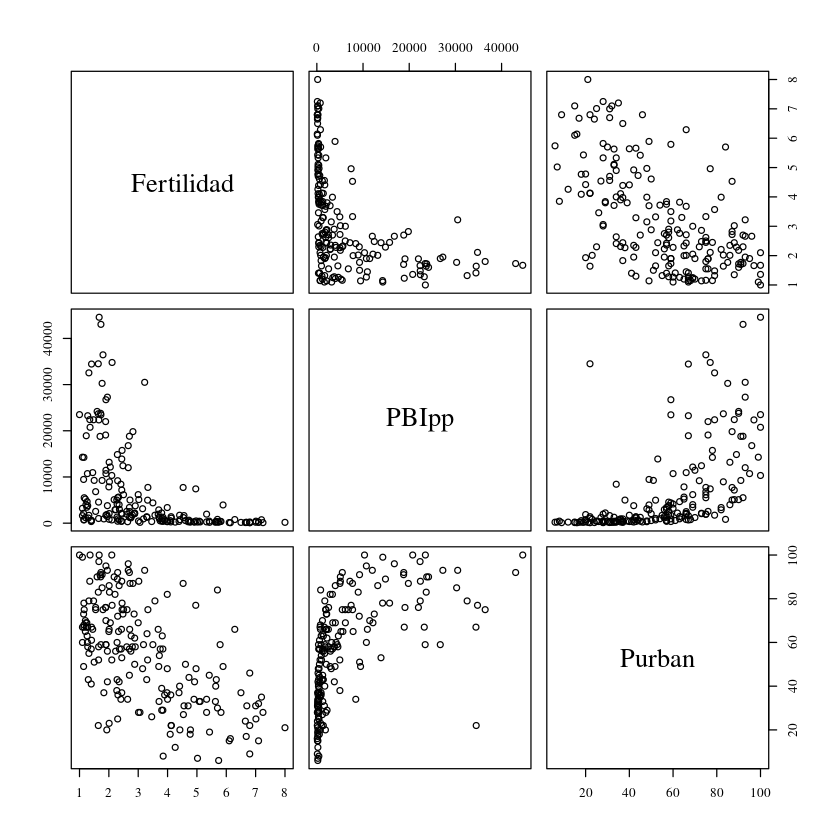

In [10]:
###############################################################################
##  Curso : Muestreo Estadistico
##  Sesion : 03
##  Tema : Análisis Exploratorio de Datos
###############################################################################


## Lectura de datos
UN.data <- read.table(file = "http://tarwi.lamolina.edu.pe/~clopez/Regresion/UN.txt", header = T)

##  en caso no se usa attach, se puede usar el $ UN.data$Fertilidad
attach(UN.data)

head(UN.data)

pairs(Fertilidad ~ PBIpp +  Purban)
pairs(Fertilidad ~ PBIpp +  Purban, data = UN.data)




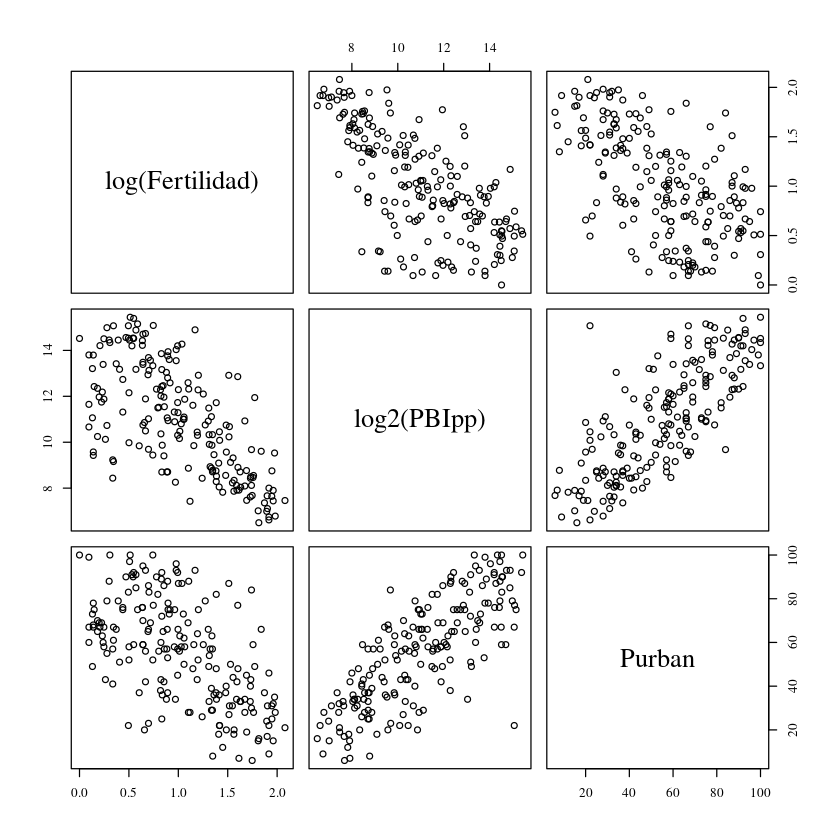

In [4]:
## Se usan logaritmicoas
pairs(log(Fertilidad) ~ log2(PBIpp) +  Purban, data = UN.data)

In [11]:
UN.m1 <- lm(log(Fertilidad) ~ log2(PBIpp))
summary(UN.m1)

## se observa  R³ = 45.91%


Call:
lm(formula = log(Fertilidad) ~ log2(PBIpp))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.11877 -0.18762  0.07041  0.26082  0.90101 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.70322    0.13538   19.97   <2e-16 ***
log2(PBIpp) -0.15330    0.01204  -12.73   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3962 on 191 degrees of freedom
Multiple R-squared:  0.4591,	Adjusted R-squared:  0.4563 
F-statistic: 162.1 on 1 and 191 DF,  p-value: < 2.2e-16


In [6]:
UN.m2 <- lm(log(Fertilidad) ~ Purban)
summary(UN.m2)

## coeficiente de detarminacion
## se observa  R³ = 34.82%


Call:
lm(formula = log(Fertilidad) ~ Purban)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.97313 -0.32270  0.03504  0.29526  1.09742 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.749720   0.078911   22.17   <2e-16 ***
Purban      -0.013175   0.001304  -10.10   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4349 on 191 degrees of freedom
Multiple R-squared:  0.3482,	Adjusted R-squared:  0.3448 
F-statistic:   102 on 1 and 191 DF,  p-value: < 2.2e-16


In [9]:
## Todo en un solo modelo

UN.m3 <- lm(log(Fertilidad) ~ log2(PBIpp) +  Purban)
summary(UN.m3)

## coeficiente de detarminacion
## se observa  R³ = 46.89%

#Residual standard error: 0.3936 on 190 degrees of freedom
#Multiple R-squared:  0.4689,	Adjusted R-squared:  0.4633 
#F-statistic: 83.88 on 2 and 190 DF,  p-value: < 2.2e-16


Call:
lm(formula = log(Fertilidad) ~ log2(PBIpp) + Purban)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.05378 -0.16952  0.06835  0.25587  0.89290 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.592996   0.146864  17.656  < 2e-16 ***
log2(PBIpp) -0.125475   0.019095  -6.571 4.67e-10 ***
Purban      -0.003522   0.001884  -1.869   0.0631 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3936 on 190 degrees of freedom
Multiple R-squared:  0.4689,	Adjusted R-squared:  0.4633 
F-statistic: 83.88 on 2 and 190 DF,  p-value: < 2.2e-16


In [ ]:
## coeficiente de detarminacion
## se observa  R³ = 46.89%
## por lo tanto existe demasiada relacion entre PBIpp y Purban, 
## no son variables independientes

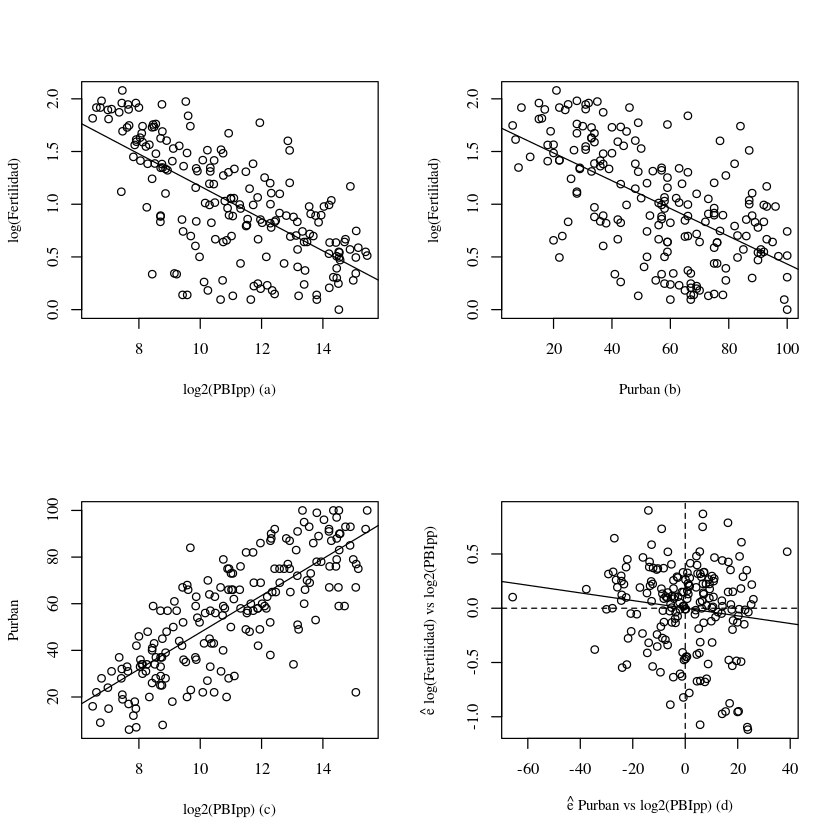

In [11]:
###########################################################
##            Grafica de Variable Añadida
###########################################################

#
#   Y = log ( Fertilidad)
#   X1 = log2 (PBIpp)
#   X2 = Purban
#

# Los residuales, es la diferencia entre lo medido y lo calculado
#                    ^
#    Y ~ X1   ---->  e1   (calculo de residuales entre Y  y  X1)
#    Y ~ X2
#                     ^
#    X2 ~ X1   ---->  e2   (calculo de residuales entre X1  y  X2) , para verificar las dependencia entre variables
#

par(mfrow = c(2, 2))
plot(log2(PBIpp), log(Fertilidad), xlab = "log2(PBIpp) (a)", cex.lab = 0.9)
abline(UN.m1)
plot(Purban, log(Fertilidad), xlab = "Purban (b)", cex.lab = 0.9)
abline(UN.m2)
UN.m3 <- lm(Purban ~ log2(PBIpp))
plot(log2(PBIpp), Purban, xlab = "log2(PBIpp) (c)", cex.lab = 0.9)
abline(UN.m3)
UN.m4 <- lm(resid(UN.m1) ~ resid(UN.m3))
plot(resid(UN.m3), resid(UN.m1), xlab = expression(paste(hat(e), " Purban vs log2(PBIpp) (d)")), ylab = expression(paste(hat(e), " log(Fertilidad) vs log2(PBIpp)")), cex.lab = 0.9)
abline(UN.m4)
abline(h = 0, lty = 2)
abline(v = 0, lty = 2)


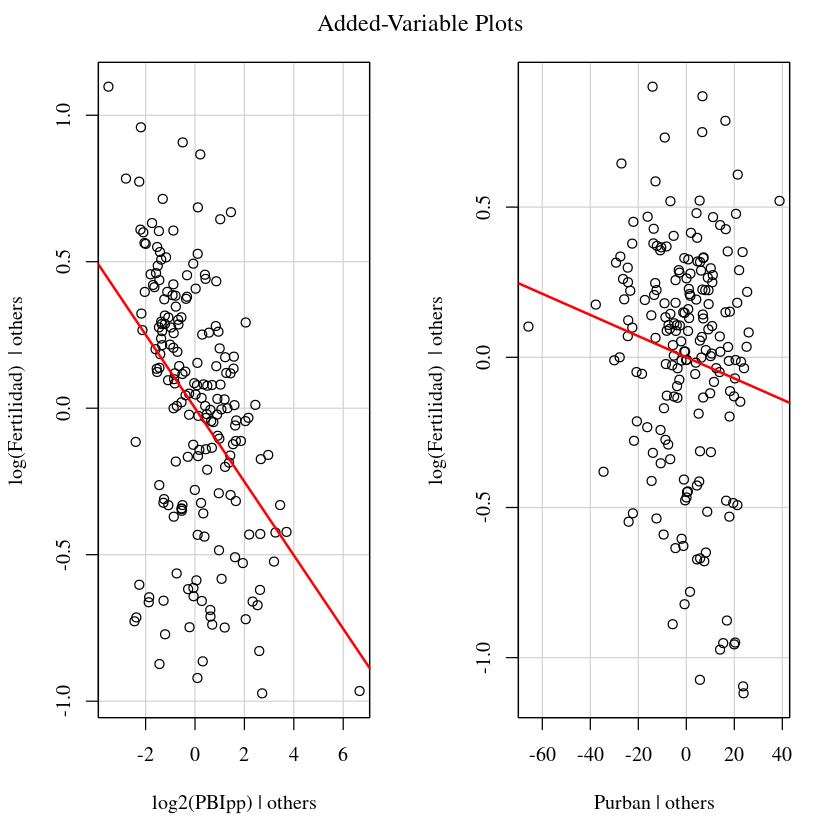

In [16]:
## Se baja las librerias para calcular las variables añadidas , de regresion parcial

library(car)

UN.m5 <- lm(log(Fertilidad) ~ log2(PBIpp) +  Purban)

avPlots(UN.m5)